In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from imblearn.over_sampling import ADASYN
from sklearn.metrics import roc_auc_score, matthews_corrcoef
import pickle

In [2]:
# Load your dataset (replace 'your_dataset.csv' with your data)
data = pd.read_excel(r'Road_Constuction_Delay_Survey.xlsx')
# data = pd.read_csv('.\Road_Constuction_Delay_Survey.csv')

data

,1.Delay in delivering material to construction site,2.Shortage of laborers and equpment,15.Cash flow problem during construction,20.Errors and omission in design,"28.Poor communication between client, consultant and contractor",31.Change schedule,33.Lowest bid price,38.Scope and specification changes,42.Weather conditions,43.Accidents during construction
0,1,1,1,3,2,1,2.0,3,2,2
1,2,2,2,5,4,4,5.0,3,1,1
2,1,2,3,2,1,3,2.0,2,1,1
3,2,4,1,4,2,2,2.0,4,4,3
4,1,2,4,2,1,3,2.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
138,5,5,5,5,4,4,4.0,5,4,4
139,3,4,2,4,3,4,4.0,3,3,3
140,3,3,2,3,2,4,4.0,4,3,3
141,3,3,2,3,2,4,4.0,4,3,3


In [3]:
data.columns

Index(['1.Delay in delivering material to construction site',
       '2.Shortage of laborers and equpment',
       '15.Cash flow problem during construction',
       '20.Errors and omission in design',
       '28.Poor communication between client, consultant and contractor',
       '31.Change schedule', '33.Lowest bid price',
       '38.Scope and specification changes ', '42.Weather conditions',
       '43.Accidents during construction'],
      dtype='object')

In [4]:
# ax = data.value_counts().sort_index() \
#     .plot(kind='bar',
#           title='Jr values value count',
#           figsize=(10, 5))
# ax.set_xlabel('Jw values')
# plt.show()

In [5]:
data = data.dropna()
data.isnull().sum()

1.Delay in delivering material to construction site                0
2.Shortage of laborers and equpment                                0
15.Cash flow problem during construction                           0
20.Errors and omission in design                                   0
28.Poor communication between client, consultant and contractor    0
31.Change schedule                                                 0
33.Lowest bid price                                                0
38.Scope and specification changes                                 0
42.Weather conditions                                              0
43.Accidents during construction                                   0
dtype: int64

In [6]:
data['1.Delay in delivering material to construction site'].value_counts()

4    56
2    26
3    24
1    23
5    13
Name: 1.Delay in delivering material to construction site, dtype: int64

In [7]:
# Separate features and target variable
X = data.drop('1.Delay in delivering material to construction site', axis=1)
y = data['1.Delay in delivering material to construction site']

In [8]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN for oversampling to handle class imbalance
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [9]:
y_train_resampled.value_counts()

4    48
5    48
1    47
3    46
2    44
Name: 1.Delay in delivering material to construction site, dtype: int64

In [10]:
y_test.value_counts()

4    8
1    8
2    5
3    4
5    4
Name: 1.Delay in delivering material to construction site, dtype: int64

Random Forest Results
Accuracy [ with RF]: 62.06896551724138 %
Recall  [ with RF]: [87.5 40.  25.  62.5 75. ] %
precision [ with RF]: [ 87.5         66.66666667 100.          50.          42.85714286] %


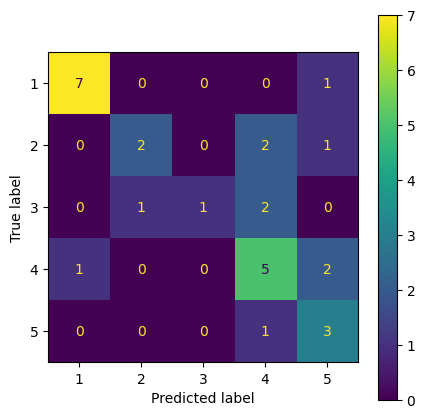

Logistic Regression Results
Accuracy [ with LR]: 44.827586206896555 %
Recall  [ with LR]: [75.  40.  25.  37.5 25. ] %
precision [ with LR]: [ 75.         100.          25.          33.33333333  16.66666667] %


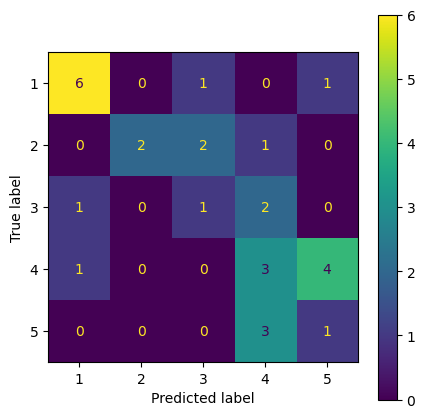

XGB Results
Accuracy [ with XGB]: 68.96551724137932 %
Recall  [ with XGB]: [87.5 40.  25.  87.5 75. ] %
precision [ with XGB]: [100.          50.          25.          77.77777778  60.        ] %


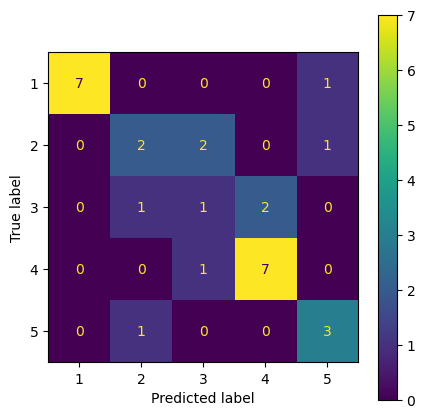

In [11]:
# develop model

# random forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model_gt = rf_model.fit(X_train_resampled, y_train_resampled)

# Predict targets on the testing data
RF_predictions_gt = rf_model_gt.predict(X_test)
rf_acc_gt = accuracy_score(y_test, RF_predictions_gt)
rf_recall_gt = recall_score(y_test, RF_predictions_gt ,average=None)
rf_precision_gt = precision_score(y_test, RF_predictions_gt, average=None)
# rf_mcc = matthews_corrcoef(y_test, RF_predictions_gt)

print("=========================================================================")
print("Random Forest Results")
print("=========================================================================")
print("Accuracy [ with RF]: " + str(rf_acc_gt * 100) + " %")
print("Recall  [ with RF]: " + str(rf_recall_gt * 100) + " %")
print("precision [ with RF]: " + str(rf_precision_gt * 100) + " %")



cm = confusion_matrix(y_test, RF_predictions_gt, labels=rf_model_gt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model_gt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

### LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 3000)
lr_model_gt = lr_model.fit(X_train_resampled, y_train_resampled)


# Predict targets on the testing data
LR_predictions_gt = lr_model_gt.predict(X_test)
lr_acc_gt = accuracy_score(y_test, LR_predictions_gt)
lr_recall_gt = recall_score(y_test, LR_predictions_gt, average=None)
lr_precision_gt = precision_score(y_test, LR_predictions_gt, average=None)
# lr_mcc = matthews_corrcoef(y_test, LR_predictions_gt)

print("=========================================================================")
print("Logistic Regression Results")
print("=========================================================================")
print("Accuracy [ with LR]: " + str(lr_acc_gt * 100) + " %")
print("Recall  [ with LR]: " + str(lr_recall_gt * 100) + " %")
print("precision [ with LR]: " + str(lr_precision_gt * 100) + " %")
# print("MCC [ with LR]: " + str(lr_mcc))

cm = confusion_matrix(y_test, LR_predictions_gt, labels=lr_model_gt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_gt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()


# XGBOOST

from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier()
xgb_model_gt = xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict targets on the testing data
XGB_predictions_gt = xgb_model_gt.predict(X_test)
xgb_acc_gt = accuracy_score(y_test, XGB_predictions_gt)
xgb_recall_gt = recall_score(y_test, XGB_predictions_gt, average=None)
xgb_precision_gt = precision_score(y_test, XGB_predictions_gt, average=None)


print("=========================================================================")
print("XGB Results")
print("=========================================================================")
print("Accuracy [ with XGB]: " + str(xgb_acc_gt * 100) + " %")
print("Recall  [ with XGB]: " + str(xgb_recall_gt * 100) + " %")
print("precision [ with XGB]: " + str(xgb_precision_gt * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y_test, XGB_predictions_gt, labels=xgb_model_gt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model_gt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

In [12]:
# Make predictions
bb= xgb_model_gt.predict([[1, 2, 2, 4, 1, 3, 1, 2, 4]])
bb

array([4])

In [13]:
bb= xgb_model_gt.predict(X_test)
bb

array([3, 2, 4, 4, 1, 2, 3, 5, 4, 5, 5, 2, 1, 3, 2, 5, 4, 4, 4, 4, 5, 1,
       1, 4, 1, 4, 1, 1, 3])

In [14]:
# save the model
with open('Construction_model.pkl', 'wb') as f:
    pickle.dump(xgb_model_gt, f)

In [15]:
with open('Construction_model.pkl', 'rb') as f:
    ConstModel = pickle.load(f)

In [16]:
ConstModel.predict([[1, 2, 2, 4, 1, 3, 1, 2, 4]])

array([4])

In [17]:


# save the model
with open('Construction.pkl', 'wb') as f:
    pickle.dump(rf_model_gt, f)

In [18]:
with open('Construction.pkl', 'rb') as f:
    model = pickle.load(f)

In [19]:
model.predict([[1, 2, 2, 4, 1, 3, 1, 2, 4]])

array([4])